### Projeto_1
A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

##### 1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
##### 2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
##### 3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda?
##### 4. Quais seriam as sugestões de mudanças?
##### 5. Qual o incremento no preço dado por cada opção de reforma?

fonte:https://sejaumdatascientist.com/

https://www.kaggle.com/harlfoxem/housesalesprediction

### Variable | Description
1. Id:Unique ID for each home sold
2. Date: Date of the home sale
3. Price: Price of each home sold
4. Bedrooms: Number of bedrooms
5. Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. Sqft_living: Square footage of the apartments interior living space
7. Sqft_lot: Square footage of the land space
8. Floors: Number of floors
9. Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
10. View: An index from 0 to 4 of how good the view of the property was
11. Condition: An index from 1 to 5 on the condition of the apartment,
12. Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
13. Sqft_above: The square footage of the interior housing space that is above ground level
14. Sqft_basement: The square footage of the interior housing space that is below ground level
15. Yr_built: The year the house was initially built
16. Yr_renovated: The year of the house’s last renovation
17. Zipcode: What zipcode area the house is in
18. Lat: Lattitude
19. Long: Longitude
20. Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
21. Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

### Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Valores duplicados

In [8]:
df.groupby(df.columns.tolist(),as_index=False).size()['size'].unique()

array([1])

### Valores que estão faltando

In [9]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Transformando a data

In [11]:
df['date']= pd.to_datetime( df['date'] ,format="%Y/%m/%d")

In [12]:
df['month_sold'] = df['date'].dt.month

In [13]:
df.drop('date', axis=1,inplace=True)

# Analisando o preço

/home/escobar/miniconda3/envs/house/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


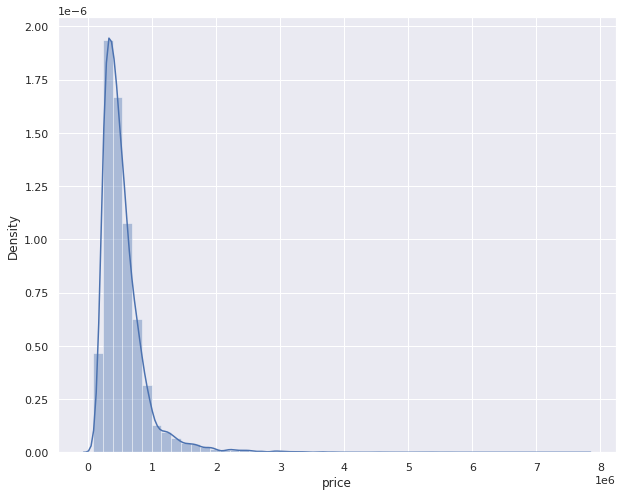

In [14]:
sns.set(style='darkgrid',rc={'figure.figsize':(10,8)})
sns.distplot(df['price']);

# Analisando os dados
* Bedrooms
* Bathrooms
* Floors
* Waterfront
* View
* Condition
* grade

Text(0.1, 33, 'Outilier')

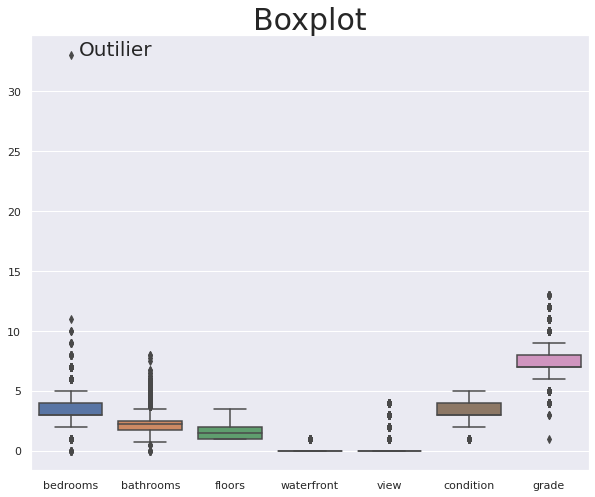

In [15]:
sns.set(style='darkgrid',rc={'figure.figsize':(10,8)})
sns.boxplot(data = df.loc[:,['bedrooms','bathrooms','floors','waterfront','view','condition','grade']]).set_title('Boxplot',size=30)
plt.annotate(text='Outilier', xy=(0.1, 33), xycoords='data', fontsize=20)


* sqft_living
* sqft_lot
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* sqft_living15
* sqft_lot15

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

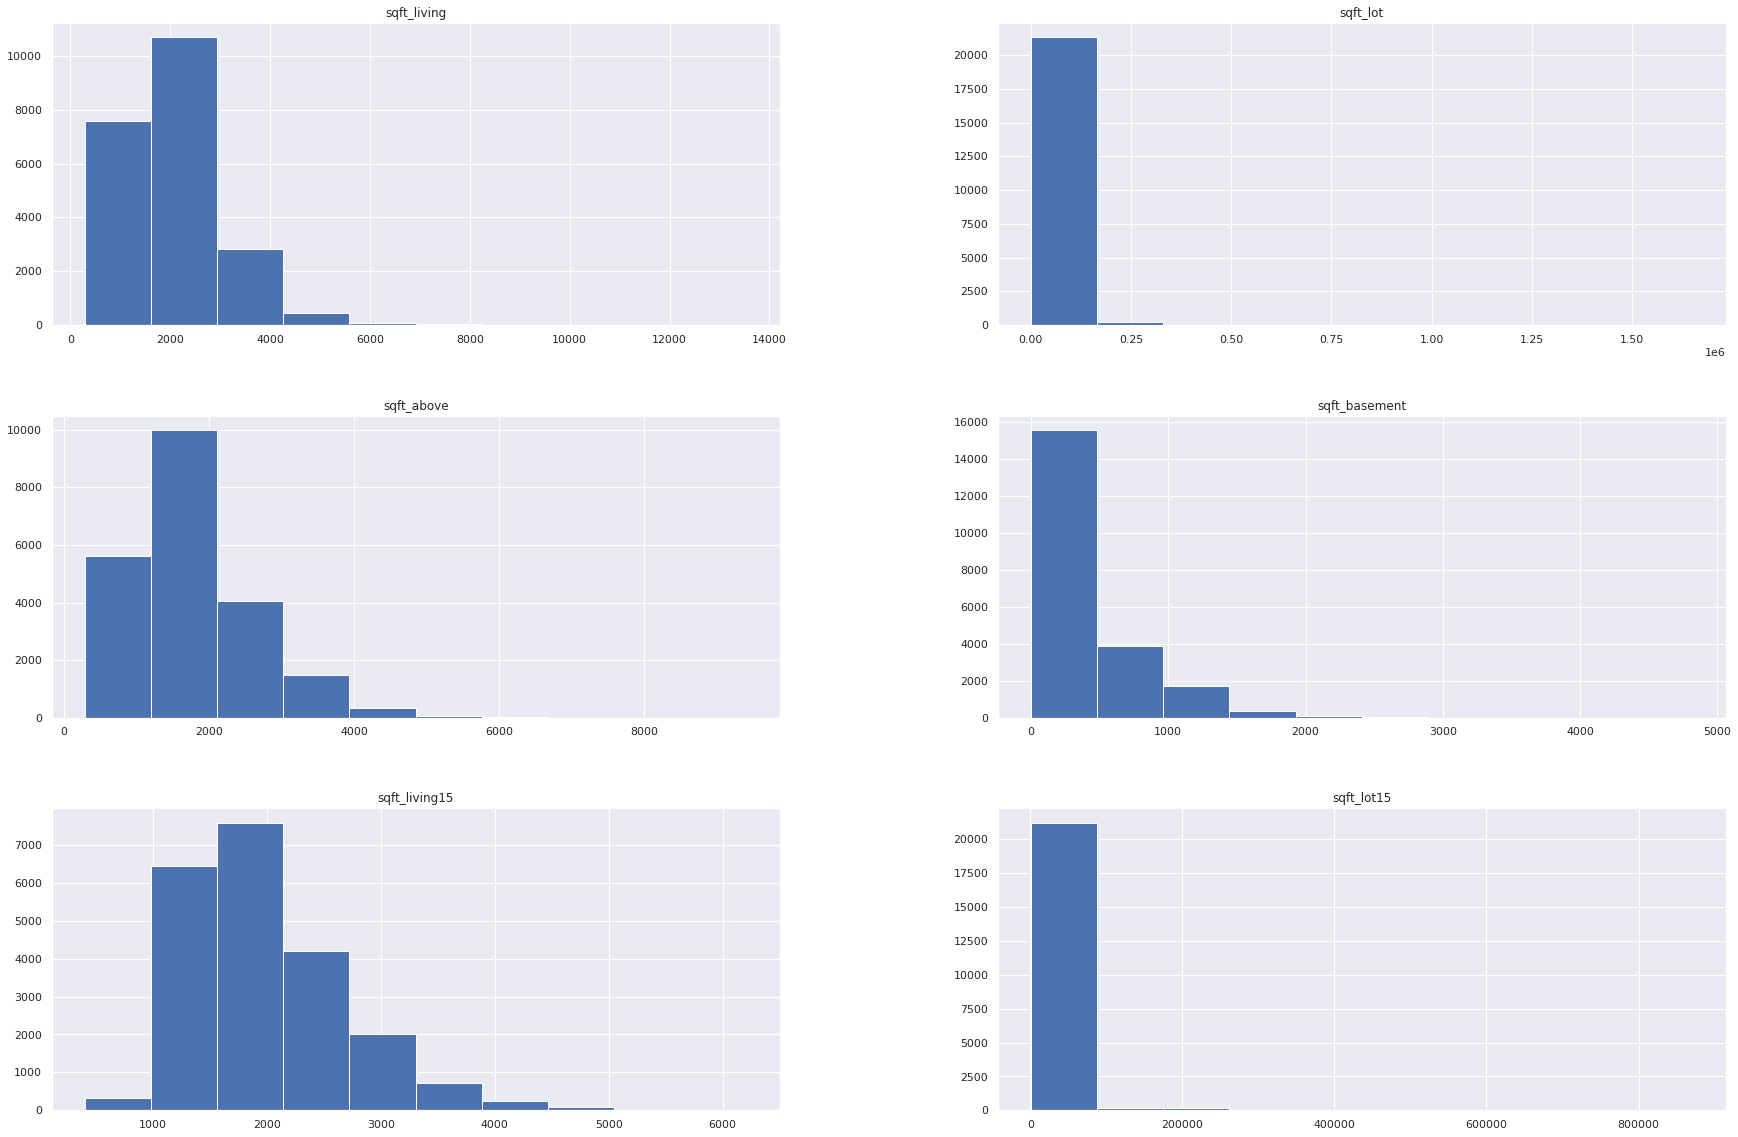

In [16]:
df.loc[:,['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].hist(figsize=(30 ,20))

In [17]:
df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [18]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [19]:
df['reforma']= np.zeros(df.shape[0])
for i in df[df['yr_renovated']!=0].index:
    df.loc[i,'reforma'] =1

In [20]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,reforma
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,1.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,0.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,0.0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,0.0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,0.0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,0.0


## bedrooms

In [21]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

### Outlier

In [22]:
df[df['bedrooms']==33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,reforma
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,...,580,1947,0,98103,47.6878,-122.331,1330,4700,6,0.0


In [23]:
df.loc[15870,'bedrooms'] =3

##  bathrooms

In [24]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#### Casas sem banheiro

In [25]:
df[df['bathrooms']==0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,reforma
875,6306400140,1095000.0,0,0.0,3064,4764,3.5,0,2,3,...,0,1990,0,98102,47.6362,-122.322,2360,4000,6,0.0
1149,3421079032,75000.0,1,0.0,670,43377,1.0,0,0,3,...,0,1966,0,98022,47.2638,-121.906,1160,42882,2,0.0
3119,3918400017,380000.0,0,0.0,1470,979,3.0,0,2,3,...,0,2006,0,98133,47.7145,-122.356,1470,1399,2,0.0
5832,5702500050,280000.0,1,0.0,600,24501,1.0,0,0,2,...,0,1950,0,98045,47.5316,-121.749,990,22549,11,0.0
6994,2954400190,1295650.0,0,0.0,4810,28008,2.0,0,0,3,...,0,1990,0,98053,47.6642,-122.069,4740,35061,6,0.0
9773,3374500520,355000.0,0,0.0,2460,8049,2.0,0,0,3,...,0,1990,0,98031,47.4095,-122.168,2520,8050,4,0.0
9854,7849202190,235000.0,0,0.0,1470,4800,2.0,0,0,3,...,0,1996,0,98065,47.5265,-121.828,1060,7200,12,0.0
10481,203100435,484000.0,1,0.0,690,23244,1.0,0,0,4,...,0,1948,0,98053,47.6429,-121.955,1690,19290,9,0.0
14423,9543000205,139950.0,0,0.0,844,4269,1.0,0,0,4,...,0,1913,0,98001,47.2781,-122.250,1380,9600,4,0.0
19452,3980300371,142000.0,0,0.0,290,20875,1.0,0,0,1,...,0,1963,0,98024,47.5308,-121.888,1620,22850,9,0.0


In [26]:
df.drop(df[df['bathrooms']==0].index, inplace=True)

# Correlação

<AxesSubplot:>

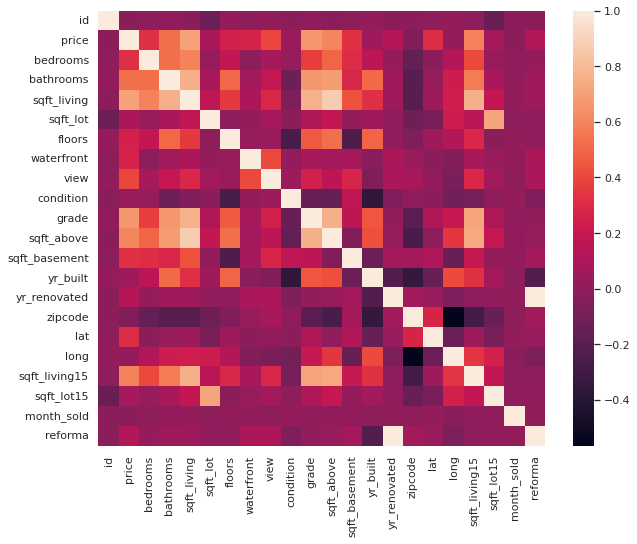

In [27]:
sns.heatmap(df.corr())

In [28]:
df.corr()['price'].sort_values(ascending=False)[0:5]

price            1.000000
sqft_living      0.701914
grade            0.667836
sqft_above       0.605371
sqft_living15    0.585209
Name: price, dtype: float64

# Entendendo como algumas variáveis se relacionam com o Preço do imóvel

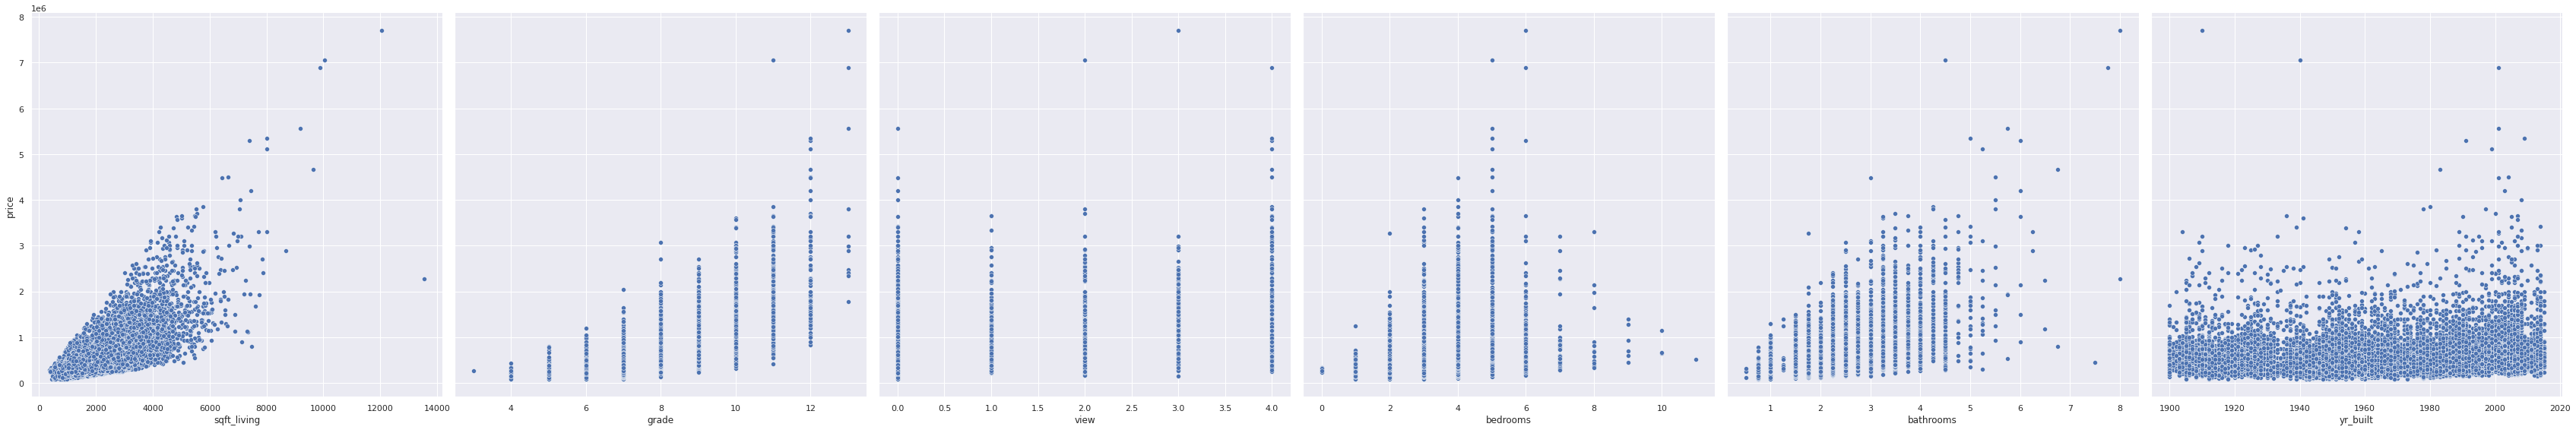

In [29]:
sns.pairplot(df, x_vars=["sqft_living", "grade","view", "bedrooms",'bathrooms','yr_built'],y_vars=["price"],height=8)

### Retirando algumas colunas

In [30]:
df_pipe = df.drop(['id','lat','long','yr_renovated'], axis=1)

In [31]:
df_pipe

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,month_sold,reforma
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650,10,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639,12,1.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062,2,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000,12,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,98103,1530,1509,5,0.0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,98146,1830,7200,2,0.0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,98144,1020,2007,6,0.0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,98027,1410,1287,1,0.0


# Preparação dos dados

In [32]:
def prepare_data(df,target,test_size):
    X = df.drop(target, axis=1)
    y = df.loc[:,target]
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) 
    response = [X_train,X_test, Y_train, Y_test]
    return response

In [33]:
X_train, X_test , Y_train, Y_test = prepare_data(df_pipe ,'price', 0.2)

# Pipeline

In [34]:
classifiers = [
DecisionTreeRegressor(),
KNeighborsRegressor(),
RandomForestRegressor(),
LinearRegression(),
GradientBoostingRegressor(),
RidgeCV(),
XGBRegressor()
]

scalers = [MinMaxScaler() ,StandardScaler()]

In [35]:
for scl in scalers:
    print(scl)
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    for clf in classifiers:
        pipe = Pipeline([('scl', scl), ('clf',clf)])
        pipe.fit(X_train, Y_train)        
        cv_score = cross_val_score(pipe, X_train, Y_train, cv=5)
        score = pipe.score(X_test, Y_test)
        print(clf)
        print('test_score |',score)
        print('cv_score |', np.mean(cv_score))
        print('-----------------------------------------------')

MinMaxScaler()
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DecisionTreeRegressor()
test_score | 0.649702629308576
cv_score | 0.6143526880201471
-----------------------------------------------
KNeighborsRegressor()
test_score | 0.6666159691254134
cv_score | 0.6713448445282701
-----------------------------------------------
RandomForestRegressor()
test_score | 0.8228762207934465
cv_score | 0.8063310594478272
-----------------------------------------------
LinearRegression()
test_score | 0.6685356278685088
cv_score | 0.6499457397653743
-----------------------------------------------
GradientBoostingRegressor()
test_score | 0.8216558056841947
cv_score | 0.8021877507687838
-----------------------------------------------
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
test_score | 0.668540163527267
cv_score | 0.6499198253362506
-----------------------------------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, c

In [36]:
pipe = Pipeline([('XGBR',  XGBRegressor())])

In [37]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('XGBR',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=4, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

<BarContainer object of 17 artists>

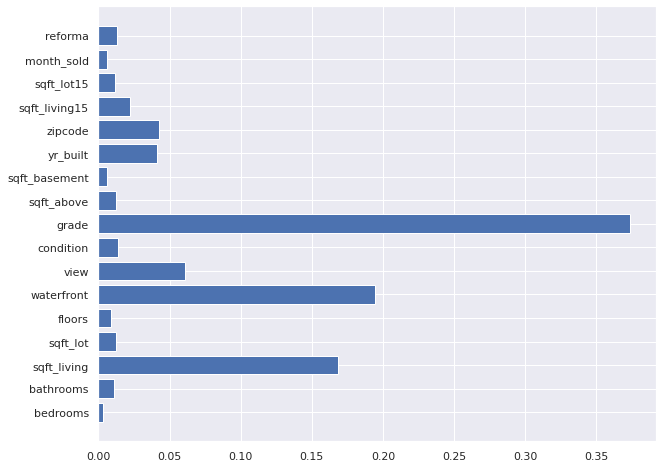

In [38]:
plt.barh(X_train.columns, pipe.steps[0][1].feature_importances_)

In [39]:
pipe.score(X_test, Y_test)

0.8540929261382566

In [40]:
y_pred_test = pipe.predict(X_test)

In [41]:
df_graf = pd.DataFrame({'Atual': Y_test, 'Predito': y_pred_test})
df_graf

,Atual,Predito
15673,390000.0,423935.43750
3339,265000.0,232681.28125
14945,839000.0,659950.25000
17488,405000.0,440013.56250
8762,422250.0,468932.18750
...,...,...
6460,595000.0,563327.12500
19025,400000.0,534494.50000
6857,280000.0,269153.12500
6187,499922.0,485181.78125


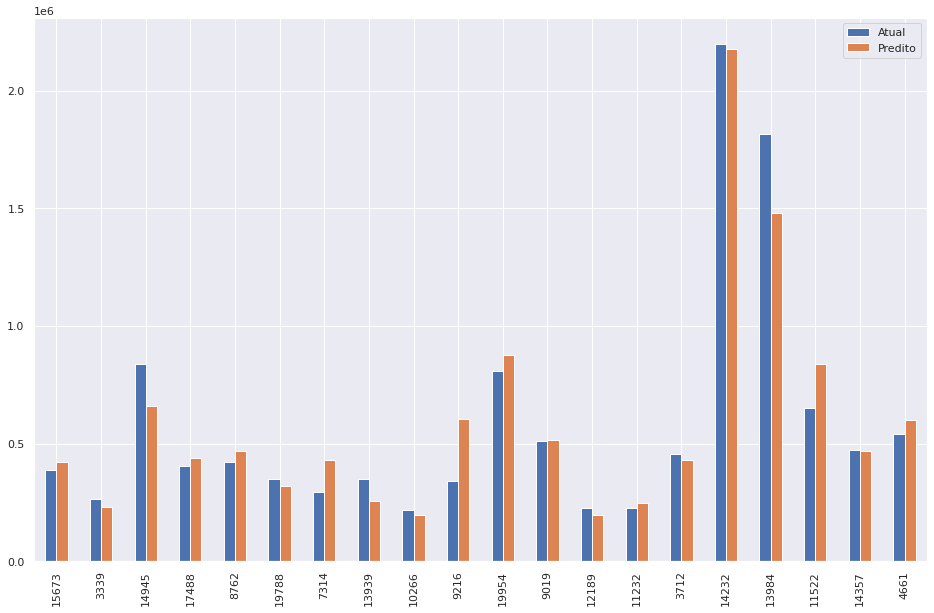

In [42]:
df1 = df_graf.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

# Resultados
       Uma vez que o modelo está treinando, conseguimos prever os possiveis valores de venda das casas. Para encontrar as melhores oportunidades de negócio, procuramos por casas que estejam com o valor abaixo do predito para que sejam vendidas por um preço maior, visando aumentar o lucro da empresa.

In [43]:
X = df_pipe.drop('price', axis=1)
y = df_pipe.loc[:,'price']

In [44]:
y_pred = pipe.predict(X)

In [45]:
df_pred = pd.DataFrame({'Atual': y, 'Predito': y_pred})
df_pred

,Atual,Predito
0,221900.0,237493.093750
1,538000.0,571286.187500
2,180000.0,200395.390625
3,604000.0,488448.875000
4,510000.0,500216.750000
...,...,...
21608,360000.0,485511.968750
21609,400000.0,528346.750000
21610,402101.0,300703.031250
21611,400000.0,426825.937500


In [46]:
df['Predito'] = y_pred

# 1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

In [47]:
df_lucros = df[df['Predito']-df['price']>0]
df_house = pd.DataFrame({'id': df_lucros['id'], 'Preço': df_lucros['Predito']})
df_house

,id,Preço
0,7129300520,2.374931e+05
1,6414100192,5.712862e+05
2,5631500400,2.003954e+05
5,7237550310,1.307458e+06
6,1321400060,2.896974e+05
...,...,...
21606,7936000429,1.029055e+06
21607,2997800021,4.962370e+05
21608,263000018,4.855120e+05
21609,6600060120,5.283468e+05


# 2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
    1.Tirando como base o lucro da venda das casas, pode-se concluir que o mês *MAIO*, foi o mês no qual mais casas foram vendidas - nesse mês foi obtido o maior lucro da empresa.
    2.A maior média do lucro no mês foi em Janeiro - casas mais caras tendem a ser vendida nesse Mês.

In [48]:
df_lucros['lucro'] = df_lucros['Predito']-df_lucros['price']
lucros = pd.DataFrame(df_lucros.groupby(['month_sold']).agg({'lucro' : ['size','mean','sum']}))
lucros['month'] = ['janeiro', 'fevereiro', 'março', 'abril' ,'maio' ,'junho' ,'julho' ,'agosto' ,'setembro' ,'outubro' ,'novembro' ,'dezembro']

/tmp/ipykernel_7274/2685863691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lucros['lucro'] = df_lucros['Predito']-df_lucros['price']


In [49]:
lucros

lucro                                  month
            size          mean           sum           
month_sold                                             
1            513  54457.706384  2.793680e+07    janeiro
2            618  53959.477675  3.334696e+07  fevereiro
3           1025  48643.107896  4.985919e+07      março
4           1115  52854.122730  5.893235e+07      abril
5           1277  52647.750447  6.723118e+07       maio
6           1137  48976.391120  5.568616e+07      junho
7           1110  49871.876091  5.535778e+07      julho
8            971  52429.825985  5.090936e+07     agosto
9            928  51555.555504  4.784356e+07   setembro
10           980  49289.544491  4.830375e+07    outubro
11           719  47611.315532  3.423254e+07   novembro
12           744  52027.073599  3.870814e+07   dezembro

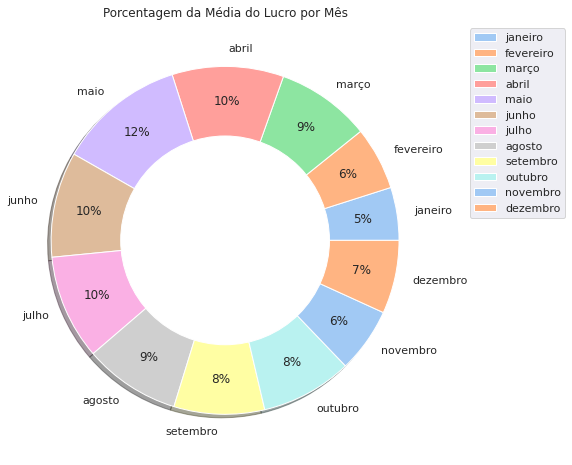

In [50]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(lucros['lucro']['sum'], labels = lucros.month, colors = colors, autopct='%.0f%%',shadow = True, pctdistance=0.80)
plt.legend(loc ="upper left", bbox_to_anchor =(1.05, 0, 0.5, 1))
centre_circle = plt.Circle((0,0),0.6,fc='white')
plt.title("Porcentagem da Média do Lucro por Mês")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

# 3. House Rocket deveria fazer uma reforma para aumentar o preço da venda?

In [51]:
nreformada = [df_lucros[df_lucros['reforma']==0].mean().lucro]

In [52]:
reformada =[df_lucros[df_lucros['reforma']==1].mean().lucro]

In [53]:
df_reformada = pd.DataFrame({'Reformada': reformada, 'Não Reformada': nreformada})

Text(0.5, 1.0, 'Média dos lucros das casas:')

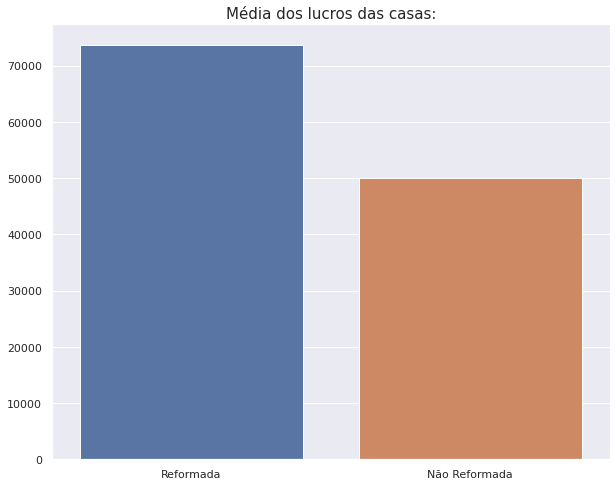

In [54]:
sns.barplot(data=df_reformada).set_title('Média dos lucros das casas:',size=15)

# 4. Quais seriam as sugestões de mudanças?

  1. As principais sugestões de mudanças seriam melhorar a estrutura e o design da casa realizando uma reforma, com isso séria possível obter um lucro maior sobre o imóvel.

In [55]:
df.corr()['price'].sort_values(ascending=False)[2:4]

sqft_living    0.701914
grade          0.667836
Name: price, dtype: float64

<AxesSubplot:xlabel='grade', ylabel='price'>

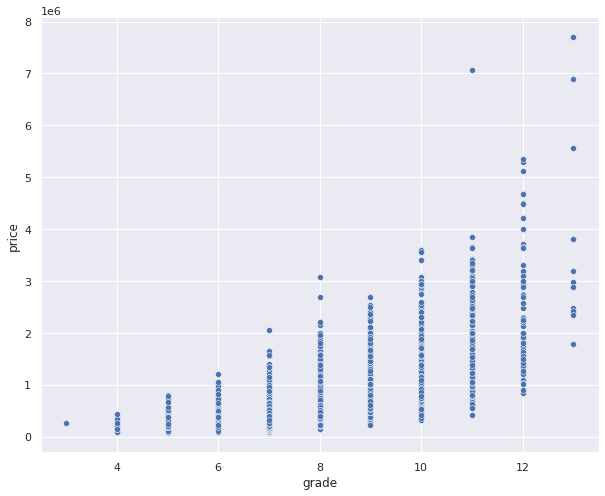

In [56]:
sns.scatterplot(data=df, x="grade", y="price")

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

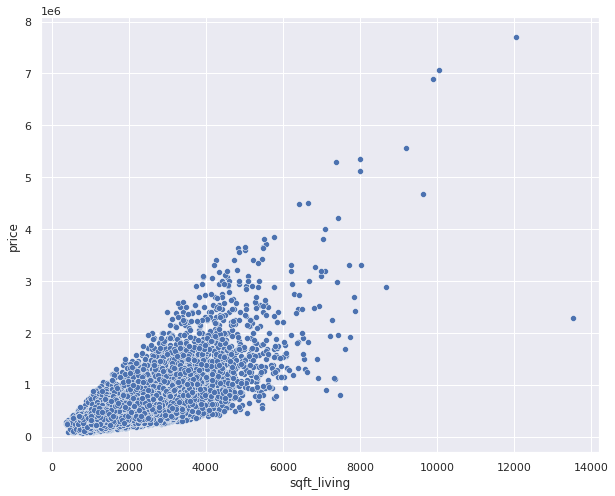

In [57]:
sns.scatterplot(data=df, x="sqft_living", y="price")

# 5. Qual o incremento no preço dado por cada opção de reforma?

In [92]:
reformada_lucro =[df_lucros[df_lucros['reforma']==1].lucro]

In [96]:
reformada_lucro = pd.DataFrame(reformada_lucro.T)

In [97]:
reformada_lucro

,lucro
1,33286.187500
35,16333.250000
103,59066.375000
115,45710.812500
158,5939.703125
...,...
19522,8355.343750
19540,36132.875000
19618,2084.562500
20447,4198.281250


In [98]:
reformada_lucro.mean()

lucro    73648.946535
dtype: float64

### Média total do lucro das casas reformadas

### 73648.946535
